In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, LSTM
from tensorflow.keras.optimizers import  Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
#Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier


2023-12-27 12:18:37.594006: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 12:18:37.653603: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 12:18:37.670932: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 12:18:37.989360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvi

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df 

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
#Revisar valores nulos
df_nulls = df.isnull().sum()
df_nulls

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [5]:
# Eliminar filas con valores faltantes
df = df.dropna()
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [6]:
# Eliminar las columnas 'Artist Name' y 'Track Name'
df = df.drop(['Artist Name', 'Track Name'], axis=1)
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
5,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
6,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [7]:
# Estandarización de los datos
valores_numericos = df.columns.drop(['key', 'mode', 'time_signature', 'Class'])

scaler = StandardScaler()

df[valores_numericos] = scaler.fit_transform(df[valores_numericos])

df.head()





,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
1,0.657863,-0.861080,0.593013,3.0,0.232529,1,-0.450090,-0.748501,-0.575982,-0.589070,0.404232,-0.220004,0.334812,4,10
2,-0.488940,-0.547837,-0.232364,6.0,-0.027879,1,-0.274522,0.770948,-0.588537,1.245203,1.295395,0.841069,-0.891468,4,6
4,0.597505,-2.156218,1.257441,2.0,0.928601,1,2.137688,-0.751419,-0.536186,-0.144588,-1.546515,2.586894,0.146873,4,10
5,0.597505,-1.746593,1.265694,6.0,2.145018,1,0.529548,-0.740887,-0.569300,-0.144588,-0.936600,1.020174,-0.041532,4,6
6,0.295715,0.897898,-0.050781,5.0,-0.337585,0,0.485287,0.513999,-0.589178,-0.607225,0.845726,0.691934,1.005103,4,2


Random Forest

In [8]:
# Separar target y features
X = df.drop(['Class'], axis=1)
y = df['Class']

In [9]:
X

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
1,0.657863,-0.861080,0.593013,3.0,0.232529,1,-0.450090,-0.748501,-0.575982,-0.589070,0.404232,-0.220004,0.334812,4
2,-0.488940,-0.547837,-0.232364,6.0,-0.027879,1,-0.274522,0.770948,-0.588537,1.245203,1.295395,0.841069,-0.891468,4
4,0.597505,-2.156218,1.257441,2.0,0.928601,1,2.137688,-0.751419,-0.536186,-0.144588,-1.546515,2.586894,0.146873,4
5,0.597505,-1.746593,1.265694,6.0,2.145018,1,0.529548,-0.740887,-0.569300,-0.144588,-0.936600,1.020174,-0.041532,4
6,0.295715,0.897898,-0.050781,5.0,-0.337585,0,0.485287,0.513999,-0.589178,-0.607225,0.845726,0.691934,1.005103,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-0.488940,-2.162242,-2.316438,7.0,-2.095575,0,-0.439762,2.359649,2.123160,-0.605347,-1.198226,1.653379,-0.168273,3
17992,-0.971804,0.681038,-1.845974,11.0,-0.461892,0,-0.563692,1.936622,-0.589129,-0.780010,-0.552337,-1.695999,0.380854,4
17993,-0.549298,0.199126,1.282202,4.0,0.833307,0,0.001370,-0.751855,-0.588734,2.948009,-0.850754,-0.609204,0.028290,4
17994,-0.851088,-1.867071,0.555871,6.0,-1.071162,0,0.927895,-0.747906,2.425994,0.381279,-0.470579,0.286594,0.058251,4


In [10]:
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [11]:
rf_model = RandomForestClassifier(n_estimators=256, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [12]:
#score
rf_model.score(X_test, y_test)

0.4748201438848921

In [13]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)

In [14]:
dtc_model.score(X_test, y_test)

0.3406686415573424

In [15]:
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)
y_train_t = to_categorical(y_train)
y_test_t = to_categorical(y_test)

In [30]:
from keras.optimizers import SGD

num_epochs = 1000
learning_rate = 5e-3
model = Sequential()
model.add(InputLayer(input_shape=(X_train_t.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

model.add(Dense(y_train_t.shape[1], activation='softmax'))
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=learning_rate, momentum=0.8),metrics=['accuracy'])
model_fit = model.fit(X_train_t, y_train_t, epochs=num_epochs, validation_data=(X_test_t, y_test_t), batch_size=32)


Epoch 1/1000
296/296 [==============================] - 0s 1000us/step - loss: 1.5712 - accuracy: 0.4002 - val_loss: 1.4123 - val_accuracy: 0.4537
Epoch 2/1000
296/296 [==============================] - 0s 736us/step - loss: 1.4300 - accuracy: 0.4453 - val_loss: 1.3663 - val_accuracy: 0.4520
Epoch 3/1000
296/296 [==============================] - 0s 714us/step - loss: 1.4094 - accuracy: 0.4538 - val_loss: 1.3682 - val_accuracy: 0.4583
Epoch 4/1000
296/296 [==============================] - 0s 711us/step - loss: 1.3897 - accuracy: 0.4547 - val_loss: 1.3912 - val_accuracy: 0.4736
Epoch 5/1000
296/296 [==============================] - 0s 732us/step - loss: 1.3922 - accuracy: 0.4610 - val_loss: 1.3671 - val_accuracy: 0.4723
Epoch 6/1000
296/296 [==============================] - 0s 714us/step - loss: 1.3760 - accuracy: 0.4692 - val_loss: 1.3671 - val_accuracy: 0.4634
Epoch 7/1000
296/296 [==============================] - 0s 716us/step - loss: 1.3721 - accuracy: 0.4693 - val_loss: 1.3619 

In [25]:
sub = pd.read_csv('submission.csv')
#imprime las columnas

genero_labels = {}
for columna in sub.columns:
    split = columna.rsplit('_', 1)
    genero_labels[int(split[1])] = split[0]
genero_labels

{0: 'Acoustic/Folk',
 1: 'Alt_Music',
 2: 'Blues',
 3: 'Bollywood',
 4: 'Country',
 5: 'HipHop',
 6: 'Indie Alt',
 7: 'Instrumental',
 8: 'Metal',
 9: 'Pop',
 10: 'Rock'}

In [26]:

#Mostrar métricas
y_test_labeled = y_test.map(genero_labels)
y_pred_labeled = pd.Series(y_pred).map(genero_labels)

classification_metrics_labeled = classification_report(y_test_labeled, y_pred_labeled, output_dict=True)
classification_metrics_labeled_df = pd.DataFrame(classification_metrics_labeled).transpose()
classification_metrics_labeled_df


,precision,recall,f1-score,support
Acoustic/Folk,0.707692,0.575000,0.634483,80.000000
Alt_Music,0.063898,0.092166,0.075472,217.000000
Blues,0.320225,0.280788,0.299213,203.000000
Bollywood,0.604167,0.674419,0.637363,43.000000
Country,0.482759,0.466667,0.474576,30.000000
HipHop,0.395062,0.351648,0.372093,91.000000
Indie Alt,0.239336,0.237089,0.238208,426.000000
Instrumental,0.892473,0.922222,0.907104,90.000000
Metal,0.508251,0.473846,0.490446,325.000000
Pop,0.240741,0.262626,0.251208,198.000000


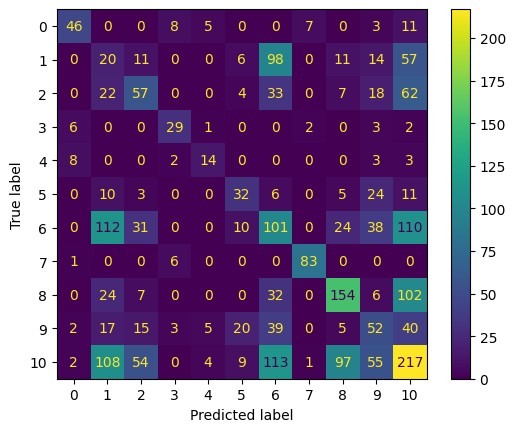

In [27]:
#matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()